#  Overview

The Terry Stops problem aims to predict the outcome of police stops based on reasonable suspicion using a classification model. The model considers various factors such as presence of weapons, time of day, and possibly gender and race of both the officer and the subject. However, the use of race and gender data raises ethical concerns and the importance of avoiding bias and discrimination must be taken into consideration. The goal of this model is to improve the efficiency and fairness of law enforcement actions, but the agencies must also monitor and address any potential biases.

# 1. Business Understanding


## 1.1. Problem
The Terry Stops presents a business opportunity to improve the efficiency and fairness of law enforcement actions. By developing a predictive model that can assist officers in determining the likelihood of an arrest being made during a Terry Stop, the law enforcement agencies can make informed decisions and potentially reduce the number of false arrests and incidents of police misconduct. However, it is important to approach this problem with caution and transparency, considering the ethical concerns raised by the use of gender and race data. The goal is to provide a tool that can help improve policing, while avoiding biases and discrimination.

## 1.2 Aim

The aim of this project is to build a classifier that can predict the outcome of a Terry Stop (whether an arrest was made or not) based on reasonable suspicion. This will be done by considering various factors such as the presence of weapons, time of day of the call, and other relevant information. The model will be designed to address the binary classification problem, with the goal of improving the efficiency and fairness of law enforcement actions.

## 1.3. 0bjectives
* To create a predictive model for Terry Stops that accurately predicts the outcome of the stop (arrest made or not)
* To take into consideration key factors such as the presence of weapons and the time of the call in the model
* To ensure that the model is ethically sound and avoids any biases or discrimination related to gender and race.

# 2. Data Understanding

## 2.1 Data Understanding
This dataset was provided by the City of Seattle and is managed by the Seattle Police Department. It was created on April 13, 2017 and last updated on February 6, 2023. The dataset contains **54873**, rows and **23** columns, each row representing a unique Terry Stop record as reported by the officer conducting the stop. The columns in the dataset include information about the subject of the stop, such as the perceived age group, perceived race, and perceived gender. 

The dataset also includes information about the officer, such as the officer's gender, race, and year of birth. Additionally, the dataset includes information about the resolution of the stop, any weapons found, the date and time the stop was reported, and information about the underlying Computer Aided Dispatch (CAD) event. The data is updated daily and is licensed under the public domain.

# 3. Requirements

* Data Preparation -> Loading Libraries -> Loading data -> Descriptive Exploration -> Data Cleaning -> Exploratory Descriptive Analysis (EDA) -> Pre-processing Data

* Modelling -> Train test split -> Logistic Regression -> K-Nearest -> Decision Tree -> Logistic Regression -> Random Forest
    
* Evaluation -> Classification Metrics -> Best Perfoming Model

* Conclusion -> Best Model
    
* Recommendation -> Most imporatnt features

# 4. Data Preparation

### 4.1. Loading Libraries

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model Selection and Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### 4.2. Loading Data

In [2]:
# read the csv file to pandas data frame
df = pd.read_csv('./Terry_Stops.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,NaN,6970,1968,M,White,...,01:23:00.0000000,-,-,-,SOUTH PCT 3RD W - ROBERT,N,N,-,-,-
1,18 - 25,-1,20180000352673,484084,Offense Report,NaN,7794,1991,M,White,...,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 1ST W - LINCOLN,N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,NaN,7795,1992,M,Hispanic or Latino,...,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,C,C1
3,1 - 17,12771262575,20200000093264,12771309361,Arrest,-,8308,1987,M,Hispanic or Latino,...,01:56:17.0000000,"DISTURBANCE, MISCELLANEOUS/OTHER",--TRAFFIC - D.U.I.,ONVIEW,NaN,Y,N,West,Q,Q3
4,56 and Above,-1,20170000000086,227439,Field Contact,NaN,8376,1975,M,Hispanic or Latino,...,14:29:00.0000000,-,-,-,NORTH PCT 2ND W - JOHN,N,N,-,-,-


### 4.2.1 Dataset Columns
##### These are the  23 columns, with a concise explanation of the information contained in each column :



In [3]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54873 entries, 0 to 54872
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         54873 non-null  object
 1   Subject ID                54873 non-null  int64 
 2   GO / SC Num               54873 non-null  int64 
 3   Terry Stop ID             54873 non-null  int64 
 4   Stop Resolution           54873 non-null  object
 5   Weapon Type               22308 non-null  object
 6   Officer ID                54873 non-null  object
 7   Officer YOB               54873 non-null  int64 
 8   Officer Gender            54873 non-null  object
 9   Officer Race              54873 non-null  object
 10  Subject Perceived Race    54873 non-null  object
 11  Subject Perceived Gender  54873 non-null  object
 12  Reported Date             54873 non-null  object
 13  Reported Time             54873 non-null  object
 14  Initial Call Type     

### 4.3.  Descriptive Exploration
Describing the data set in terms of shape and the data types for all the columns present. Most of the columns are categorical and have the 'object' datatype.

In [4]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject ID,54873.0,4.733982e+09,8.203096e+09,-8.0,-1.000000e+00,-1.000000e+00,7.732994e+09,4.149222e+10
GO / SC Num,54873.0,2.018135e+13,8.883140e+10,-1.0,2.016000e+13,2.018000e+13,2.020000e+13,2.023000e+13
Terry Stop ID,54873.0,7.648965e+09,1.171084e+10,28020.0,2.123010e+05,4.677610e+05,1.279593e+10,4.149624e+10
Officer YOB,54873.0,1.983519e+03,9.508902e+00,1900.0,1.979000e+03,1.986000e+03,1.990000e+03,2.000000e+03


### 4.4 Data Cleaning

Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps
* handling missing values
* removing duplicates
* correcting data format
* transforming variables to make the data ready for modelling and predictions.

### 4.4.1 Missing Values

In [5]:
#check the missing values
missing_values = df.isnull().sum()
missing_values

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad               20729
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

### 4.4.1.1 Weapon Type

In [6]:
df['Weapon Type'].value_counts()

Weapon Type
-                                       18917
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument        1030
Handgun                                   349
Blunt Object/Striking Implement           136
Firearm Other                             100
Firearm                                    73
Club, Blackjack, Brass Knuckles            49
Other Firearm                              47
Mace/Pepper Spray                          44
Firearm (unk type)                         15
Taser/Stun Gun                             14
None/Not Applicable                        13
Fire/Incendiary Device                     11
Club                                        9
Rifle                                       9
Shotgun                                     4
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Brass Knuckles                              1
Blackjack                                   1
Name: count, dtype: in

In [7]:
#fill - with None
df.loc[df['Weapon Type'] == '-', 'Weapon Type'] = 'None/Not Applicable'
df['Weapon Type'].value_counts()

Weapon Type
None/Not Applicable                     18930
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument        1030
Handgun                                   349
Blunt Object/Striking Implement           136
Firearm Other                             100
Firearm                                    73
Club, Blackjack, Brass Knuckles            49
Other Firearm                              47
Mace/Pepper Spray                          44
Firearm (unk type)                         15
Taser/Stun Gun                             14
Fire/Incendiary Device                     11
Club                                        9
Rifle                                       9
Shotgun                                     4
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Brass Knuckles                              1
Blackjack                                   1
Name: count, dtype: int64

In [8]:
#group firearms
df.loc[df['Weapon Type'] == 'Handgun', 'Weapon Type'] = 'Firearm'
df.loc[df['Weapon Type'] == 'Firearm Other', 'Weapon Type'] = 'Firearm'
df.loc[df['Weapon Type'] == 'Other Firearm', 'Weapon Type'] = 'Firearm'
df.loc[df['Weapon Type'] == 'Firearm (unk type)', 'Weapon Type'] = 'Firearm'
df.loc[df['Weapon Type'] == 'Rifle', 'Weapon Type'] = 'Firearm'
df.loc[df['Weapon Type'] == 'Shotgun', 'Weapon Type'] = 'Firearm'
df.loc[df['Weapon Type'] == 'Automatic Handgun', 'Weapon Type'] = 'Firearm'

#group blunt objects
df.loc[df['Weapon Type'] == 'Club, Blackjack, Brass Knuckles', 'Weapon Type'] = 'Blunt Object/Striking Implement'
df.loc[df['Weapon Type'] == 'Club', 'Weapon Type'] = 'Blunt Object/Striking Implement'
df.loc[df['Weapon Type'] == 'Brass Knuckles', 'Weapon Type'] = 'Blunt Object/Striking Implement'
df.loc[df['Weapon Type'] == 'Blackjack', 'Weapon Type'] = 'Blunt Object/Striking Implement'
df.loc[df['Weapon Type'] == 'Personal Weapons (hands, feet, etc.)', 'Weapon Type'] = 'Blunt Object/Striking Implement'

#group others
df.loc[df['Weapon Type'] == 'Mace/Pepper Spray', 'Weapon Type'] = 'Other'
df.loc[df['Weapon Type'] == 'Taser/Stun Gun', 'Weapon Type'] = 'Other'
df.loc[df['Weapon Type'] == 'Fire/Incendiary Device', 'Weapon Type'] = 'Other'

#group knives
df.loc[df['Weapon Type'] == 'Knife/Cutting/Stabbing Instrument', 'Weapon Type'] = 'Lethal Cutting Instrument'

In [9]:
df['Weapon Type'].value_counts()

Weapon Type
None/Not Applicable                18930
Lethal Cutting Instrument           2512
Firearm                              599
Blunt Object/Striking Implement      198
Other                                 69
Name: count, dtype: int64

In [10]:
#fill missing values
modal_type = df['Weapon Type'].mode()[0]
df['Weapon Type'].fillna(modal_type, inplace = True)

In [11]:
df.isnull().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                     0
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad               20729
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

### 4.4.2 Duplicate Values

In [12]:
#check for duplicates
duplicated = df.duplicated().sum()

print(f"The number of duplicates before dropping is {duplicated}")

#drop duplicates
dropped_duplicates = df.drop_duplicates(inplace=True)

print(f"The number of duplicates after dropping is {dropped_duplicates}")

The number of duplicates before dropping is 5
The number of duplicates after dropping is None


### 4.4.3 Shape of The Dataframe

In [13]:
#check shape
df.shape

(54868, 23)

### 4.4.4 Adding Month

In [14]:
#change reported column to date time
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

#add month as a column
df['Month'] = df['Reported Date'].dt.month

#check
df.head(1)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month
0,26 - 35,-1,20160000004638,207171,Field Contact,None/Not Applicable,6970,1968,M,White,...,-,-,-,SOUTH PCT 3RD W - ROBERT,N,N,-,-,-,10


### 4.4.5 Adding Day/Night

In [15]:
#change reported time to either day or night
df['day/night'] = df['Reported Time'].apply(lambda x: 'night' if '00:00' <= x <= '05:00' or '19:00' <= x <= '23:00' else 'day')
df.head(1)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month,day/night
0,26 - 35,-1,20160000004638,207171,Field Contact,None/Not Applicable,6970,1968,M,White,...,-,-,SOUTH PCT 3RD W - ROBERT,N,N,-,-,-,10,night


### 4.4.6 Target Variable

In [16]:
#check target variable
df['Stop Resolution'].value_counts()

Stop Resolution
Field Contact               23728
Offense Report              16755
Arrest                      13461
Referred for Prosecution      728
Citation / Infraction         196
Name: count, dtype: int64

In [17]:
#change to 0 and 1
df.loc[df['Stop Resolution'] != 'Arrest', 'Stop Resolution'] = '0'
df.loc[df['Stop Resolution'] == 'Arrest', 'Stop Resolution'] = '1'
df['Stop Resolution'].value_counts()

Stop Resolution
0    41407
1    13461
Name: count, dtype: int64

In [18]:
#change type
df['Stop Resolution'] = df['Stop Resolution'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54868 entries, 0 to 54872
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Subject Age Group         54868 non-null  object             
 1   Subject ID                54868 non-null  int64              
 2   GO / SC Num               54868 non-null  int64              
 3   Terry Stop ID             54868 non-null  int64              
 4   Stop Resolution           54868 non-null  int64              
 5   Weapon Type               54868 non-null  object             
 6   Officer ID                54868 non-null  object             
 7   Officer YOB               54868 non-null  int64              
 8   Officer Gender            54868 non-null  object             
 9   Officer Race              54868 non-null  object             
 10  Subject Perceived Race    54868 non-null  object             
 11  Subject Perceived Ge

### 4.4.7 Officer YOB

In [19]:
#check yob
df['Officer YOB'].head(1)

0    1968
Name: Officer YOB, dtype: int64

In [20]:
#change type to int
df['Officer YOB'].astype('int64').head(1)

0    1968
Name: Officer YOB, dtype: int64

In [21]:
#change to age
#calculate current year
current_year = pd.Timestamp.now().year

#get age
df['Age'] = current_year - df['Officer YOB']
df['Age'].value_counts()

Age
38     3733
37     3479
33     3049
40     2958
32     2933
34     2762
39     2649
36     2425
35     2363
42     1971
41     1901
29     1833
31     1823
45     1743
43     1631
30     1423
53     1282
48     1255
46     1226
47     1111
28     1032
51     1015
44      957
27      814
57      804
54      678
56      669
55      595
49      585
50      582
62      464
60      461
52      455
59      424
61      265
58      239
63      238
66      222
65      174
64      161
26      138
124     100
70       44
67       43
71       35
25       33
24       25
69       21
68       17
76       11
72        9
75        5
78        2
73        1
Name: count, dtype: int64

In [22]:
#drop the rows with age over 100
df = df[df['Age'] <= 100]
df['Age'].value_counts()

Age
38    3733
37    3479
33    3049
40    2958
32    2933
34    2762
39    2649
36    2425
35    2363
42    1971
41    1901
29    1833
31    1823
45    1743
43    1631
30    1423
53    1282
48    1255
46    1226
47    1111
28    1032
51    1015
44     957
27     814
57     804
54     678
56     669
55     595
49     585
50     582
62     464
60     461
52     455
59     424
61     265
58     239
63     238
66     222
65     174
64     161
26     138
70      44
67      43
71      35
25      33
24      25
69      21
68      17
76      11
72       9
75       5
78       2
73       1
Name: count, dtype: int64

### 4.4.8 Precinct

In [23]:
#check precinct type
df['Precinct'].value_counts()

Precinct
West         14469
North        11919
-            10305
East          7073
South         6503
Southwest     4213
Unknown        200
OOJ             64
FK ERROR        22
Name: count, dtype: int64

In [24]:
#change the - to unknown
df.loc[df['Precinct'] == '-', 'Precinct'] = 'Unknown'
df.loc[df['Precinct'] == 'FK ERROR', 'Precinct'] = 'Unknown'
df['Precinct'].value_counts()

Precinct
West         14469
North        11919
Unknown      10527
East          7073
South         6503
Southwest     4213
OOJ             64
Name: count, dtype: int64

### 4.4.9 Gender

In [25]:
#check subject gender
df['Subject Perceived Gender'].value_counts()

Subject Perceived Gender
Male                                                         43164
Female                                                       10946
Unable to Determine                                            326
-                                                              237
Unknown                                                         69
Gender Diverse (gender non-conforming and/or transgender)       25
DUPLICATE                                                        1
Name: count, dtype: int64

In [26]:
#deal with - 
df.loc[df['Subject Perceived Gender'] == '-', 'Subject Perceived Gender'] = 'Unknown'

#deal with unable to determine
df.loc[df['Subject Perceived Gender'] == 'Unable to Determine', 'Subject Perceived Gender'] = 'Unknown'

#drop duplicate
df = df[df['Subject Perceived Gender'] != 'DUPLICATE']

df['Subject Perceived Gender'].value_counts()

Subject Perceived Gender
Male                                                         43164
Female                                                       10946
Unknown                                                        632
Gender Diverse (gender non-conforming and/or transgender)       25
Name: count, dtype: int64

### 4.4.10 Subject Race

In [27]:
df['Subject Perceived Race'].value_counts()

Subject Perceived Race
White                                        26905
Black or African American                    16276
Unknown                                       3669
Asian                                         1833
-                                             1797
Hispanic                                      1683
American Indian or Alaska Native              1530
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander      113
Name: count, dtype: int64

In [28]:
#change - to unknown
df.loc[df['Subject Perceived Race'] == '-', 'Subject Perceived Race'] = 'Unknown'
df['Subject Perceived Race'].value_counts()

Subject Perceived Race
White                                        26905
Black or African American                    16276
Unknown                                       5466
Asian                                         1833
Hispanic                                      1683
American Indian or Alaska Native              1530
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander      113
Name: count, dtype: int64

### 4.4.11 Dropping Unwanted Columns

In [29]:
#columns to drop
columns_to_drop = ['Subject ID', 
           'GO / SC Num', 
           'Terry Stop ID', 
           'Officer ID',    
           'Reported Time',
           'Reported Date',
           'Initial Call Type',
           'Final Call Type',
           'Officer Squad']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head(1)

,Subject Age Group,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month,day/night,Age
0,26 - 35,0,None/Not Applicable,1968,M,White,Black or African American,Male,-,N,N,Unknown,-,-,10,night,56


### 4.4.12 Sector Column

In [30]:
df['Sector'].value_counts()

Sector
-     10545
K      4556
M      4477
E      3660
N      3297
D      3152
B      2577
F      2566
R      2404
L      2369
Q      2279
O      2091
S      2009
U      2003
G      1799
J      1672
W      1645
C      1613
99       53
Name: count, dtype: int64

In [31]:
#impute 99 as -
df.loc[df['Sector'] == '99', 'Sector'] = '-'

In [32]:
#check if changes reflect
df['Sector'].value_counts()

Sector
-    10598
K     4556
M     4477
E     3660
N     3297
D     3152
B     2577
F     2566
R     2404
L     2369
Q     2279
O     2091
S     2009
U     2003
G     1799
J     1672
W     1645
C     1613
Name: count, dtype: int64

### 4.4.13 Beat Column

In [33]:
#check beat column
df['Beat'].value_counts()

Beat
-      10450
K3      2464
M3      2026
N3      1634
E2      1548
M2      1237
N2      1235
M1      1217
D1      1216
D2      1191
E1      1184
K2      1126
R2      1099
Q3      1097
F2      1056
B2       966
K1       966
B1       957
U2       937
E3       927
O1       865
L2       817
S2       802
L1       798
F3       772
L3       754
D3       745
F1       738
R1       710
W2       700
Q2       685
U1       677
G2       668
S3       665
B3       656
O3       649
C1       635
J3       633
G3       625
J1       617
R3       595
O2       577
C3       568
W1       546
S1       542
G1       505
Q1       497
N1       427
J2       422
C2       411
W3       400
U3       389
99       103
OOJ       39
S          2
Name: count, dtype: int64

In [34]:
#impute 99 to -
df.loc[df['Beat'] == '99', 'Beat'] = '-'

In [35]:
df['Beat'].value_counts()

Beat
-      10553
K3      2464
M3      2026
N3      1634
E2      1548
M2      1237
N2      1235
M1      1217
D1      1216
D2      1191
E1      1184
K2      1126
R2      1099
Q3      1097
F2      1056
B2       966
K1       966
B1       957
U2       937
E3       927
O1       865
L2       817
S2       802
L1       798
F3       772
L3       754
D3       745
F1       738
R1       710
W2       700
Q2       685
U1       677
G2       668
S3       665
B3       656
O3       649
C1       635
J3       633
G3       625
J1       617
R3       595
O2       577
C3       568
W1       546
S1       542
G1       505
Q1       497
N1       427
J2       422
C2       411
W3       400
U3       389
OOJ       39
S          2
Name: count, dtype: int64

### 4.4.15 One Hot Encoding

In [36]:
#ohe the categorical columns
categorical_columns = df.select_dtypes(include = ['object', 'category']).columns

df_encoded = pd.get_dummies(df, columns = categorical_columns, drop_first=True)

df_encoded.head(1)

,Stop Resolution,Officer YOB,Month,Age,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,...,Beat_S1,Beat_S2,Beat_S3,Beat_U1,Beat_U2,Beat_U3,Beat_W1,Beat_W2,Beat_W3,day/night_night
0,0,1968,10,56,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## 4.5. Exploratory Data Analysis

### 4.5.1 Descriptive Statistics

In [37]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Stop Resolution,54767.0,0.245403,0.430330,0.0,0.0,0.0,0.0,1.0
Officer YOB,54767.0,1983.671390,8.821919,1946.0,1979.0,1986.0,1990.0,2000.0
Month,54767.0,6.480928,3.351380,1.0,4.0,6.0,9.0,12.0
Age,54767.0,40.328610,8.821919,24.0,34.0,38.0,45.0,78.0


### 4.5.2 Correlation Matrix

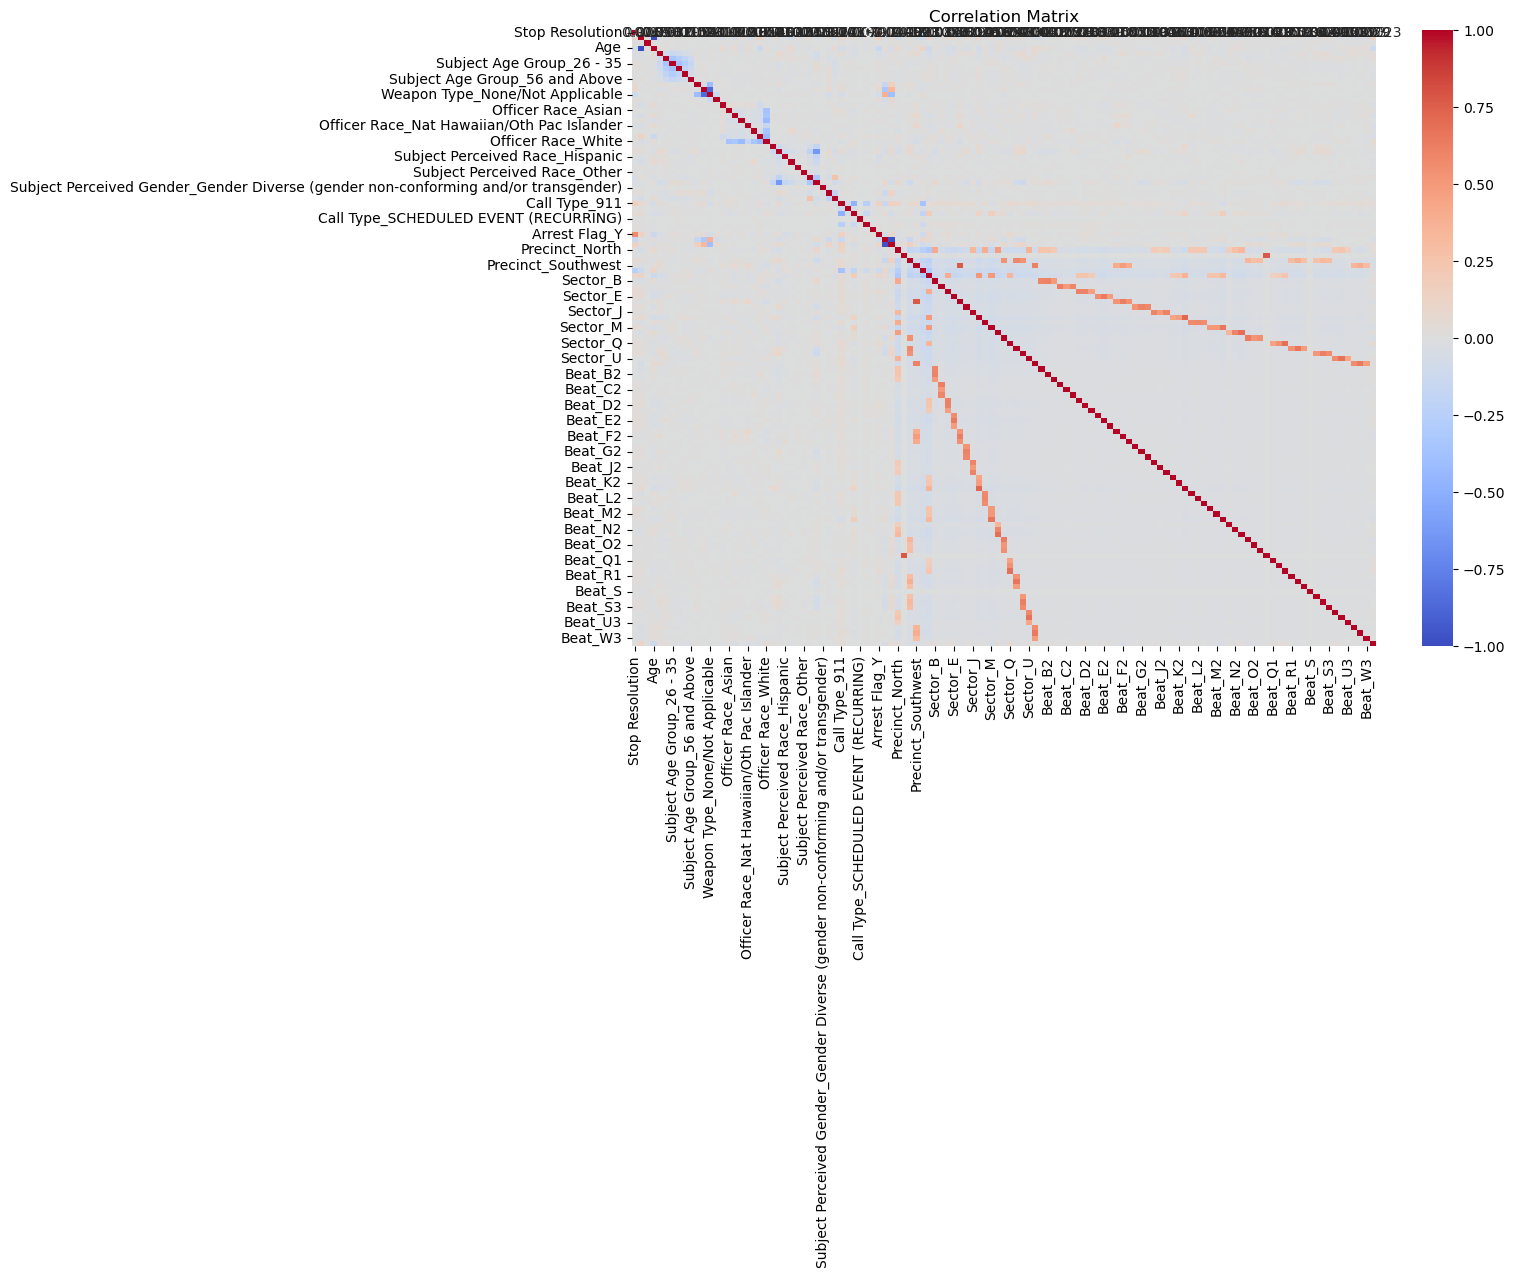

In [38]:
corr_matrix = df_encoded.corr()

#plot the heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 4.5.3 Distribution Analysis

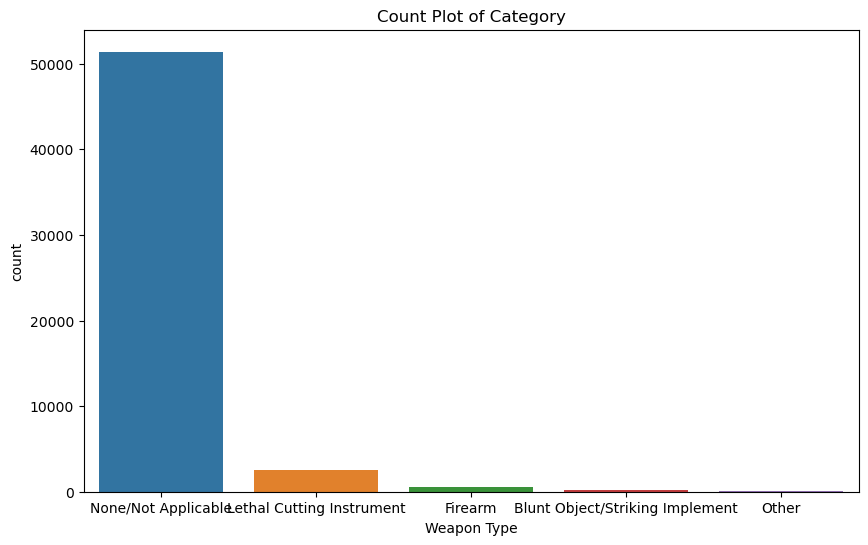

In [39]:
#plot distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weapon Type')
plt.title('Count Plot of Category')
plt.show()

## 5. Modelling

### 5.1 Set Target

In [40]:
#define the target

y= df_encoded['Stop Resolution']
X = df_encoded.drop('Stop Resolution', axis = 1)

### 5.2 Train/Test

In [41]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### 5.3 Baseline Model

In [42]:
#initialize the model
clf = LogisticRegression()

clf.fit(X_train, y_train)

C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#prediction and score

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

clf.score(X_test, y_test)

0.8462662041263466

### 5.4 Classification Report

In [44]:
#get the classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      8209
           1       0.96      0.40      0.57      2745

    accuracy                           0.85     10954
   macro avg       0.90      0.70      0.74     10954
weighted avg       0.86      0.85      0.82     10954



### 5.5 Cross Val Score

In [45]:
#cross val score
cross_val_score(clf, X_train, y_train, cv=3)

C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

array([0.84847655, 0.85298548, 0.84956176])

## 6. Model Evaluation

### 6.1 Descision Tree 

Lets see if our accuracy is going to improve when we use Decision Trees since they are better at classification than Logisitc Regression

In [46]:
#instantiate the DT
dt = DecisionTreeClassifier()

In [55]:
#obtain the cv score of the decision tree
dt_cv_score = cross_val_score(dt, X_train, y_train, cv = 3).mean()
print(f"The decision tree Mean CV Score is {dt_cv_score :.2%}")

The decision tree Mean CV Score is 79.87%


In [53]:
#params for grid search for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 12],
    'min_samples_split': [1, 2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 5]
}

In [56]:
#instantiate grid search
grid_search = GridSearchCV(dt, param_grid, cv=3, return_train_score=True)

#fit
grid_search.fit(X_train, y_train)

#obtain best parameters
print('Best Params: ', grid_search.best_params_)

#obtain best score
print('Best Score: ', grid_search.best_score_)

Best Params:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.850752077447216


C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Brian Nyagah\anaconda3\Lib\

In [65]:
#instantiate the decision tree with best parameters
dt_best_param = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2,
    min_samples_leaf = 1,
    min_samples_split = 2
)


In [66]:
#fit classifier
dt_best_param.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [74]:
#obtain predicted score of test and train
test_preds = dt_best_param.predict(X_test)
train_preds = dt_best_param.predict(X_train)

dt_best_param.score(X_test, y_test )

0.8477268577688516

In [70]:
# Classification report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      8209
           1       1.00      0.39      0.56      2745

    accuracy                           0.85     10954
   macro avg       0.92      0.70      0.74     10954
weighted avg       0.87      0.85      0.82     10954



# 7. Conclusion

The problem statement for this was to create a predictor. I created 2, both had scores of over 80%

This conclusion suggests that the model is placing a significant emphasis on the outcome of the Terry stop (i.e., whether an arrest was made or not) 

## 8. Recommendations

1. Train officers on the appropriate times to make an arrest during a Terry Stop as this is a key indicator of arrests.
Try to capture the officer's precinct for all Terry Stops to better predict arrests.
Train officers on the appropriate times to frisk someone, as this is another key indicator of arrests.

2. Address any biases in the data: The model's predictions may be influenced by biases in the data. For example, there may be biases in the distribution of Terry stops based on race, gender, or location. These biases should be identified and addressed to ensure that the model provides fair and unbiased predictions. 